In [1]:
%pip install pandas
%pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/df/92/a3fa053c74198f9f0224b2c04dc74f41d2e14e30329c082f7a657f9ca4c5/pandas-2.1.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy<2,>=1.26.0 from https://files.pythonhosted.org/packages/28/75/3b679b41713bb60e2e8f6e2f87be72c971c9e718b1c17b8f8749240ddca8/numpy-1.26.2-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB ? eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.5 MB 30.4 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/71/00/46562cbdf644aeaa20666d920e2d6b71a0096ff987ef878ec510e4c1d886/fonttools-4.45.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/158.4 kB ? eta -:--:--
     ---------------------------------------- 158.4/158.4 kB ? eta 0:

In [2]:
plt.rc("font", family = "malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

### (1) 데이터 업로드 후 헤더와 상위 3개 데이터 출력하기

In [4]:
f=open("./20231130/weather.csv", encoding="cp949")
data=csv.reader(f)
header=next(data)
data=list(data)
print(len(data))
print(header)
print()
print(data[0])
print(data[1])
print(data[2])

35651
['일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']

['1921-01-01', '2.3', '5.2', '-0.4']
['1921-01-02', '-3.4', '1.5', '-5.8']
['1921-01-03', '-6.5', '-2.7', '-9.5']


In [12]:
max_temp = -999
max_date = ""

for row in data:
    if row[2] and float(row[2])>max_temp:
        max_temp=float(row[2])
        max_date=row[0]
print(f"기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 {max_date} 로 {max_temp} 도이다.")

기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 2018-08-01 로 39.6 도이다.


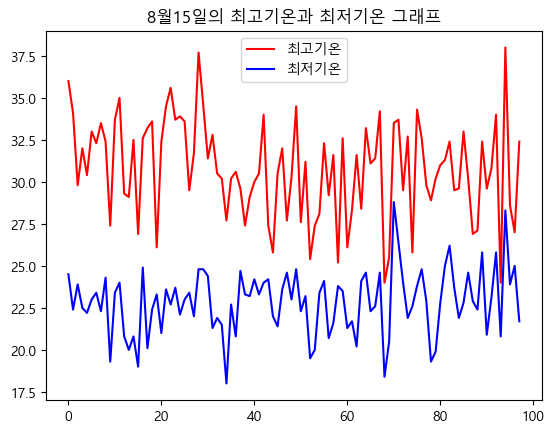

In [18]:
high = []
low = []
for row in data:
    if "08-15" in row[0]:
        if row[2]:
            high.append(float(row[2]))
        if row[3]:
            low.append(float(row[3]))
plt.title("8월15일의 최고기온과 최저기온 그래프")
plt.plot(high, color="red", label="최고기온")
plt.plot(low, color="blue", label="최저기온")
plt.legend()
plt.show()

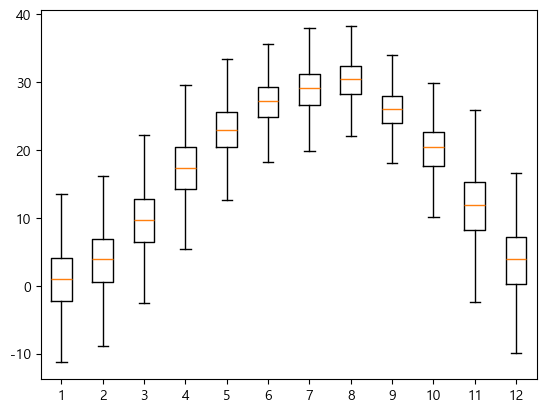

In [24]:
month=[[] for i in range(12)]
for row in data:
    if row[2]:
        month[int(row[0].split('-')[1])-1].append(float(row[2]))
plt.boxplot(month, showfliers=False)
plt.show()

In [46]:
data=open("train.csv", encoding="cp949")
header=next(data)
data=list(data)
dataa=pd.read_csv("./20231130/train.csv")
dataa.info()
print(data[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
['1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n', '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n', '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'

{'생존 남성': 0, '사망 남성': 0, '생존 여성': 802, '사망 여성': 89}


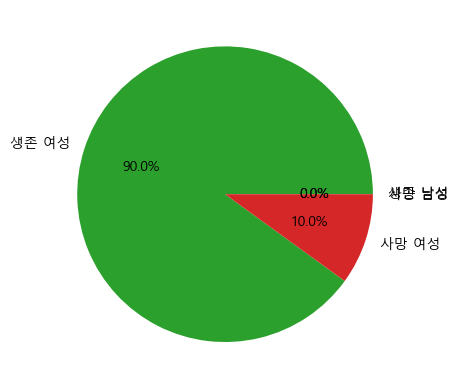

In [51]:
SBG = {"생존 남성": 0, "사망 남성": 0, "생존 여성": 0, "사망 여성": 0}
for row in data:
    if row[4] and row[1]:
        if row[4] == "male":
            if row[1] == '0':
                SBG["사망 남성"] += 1
            else:
                SBG["생존 남성"] += 1
        else:
            if row[1] == '0':
                SBG["사망 여성"] += 1
            else:
                SBG["생존 여성"] += 1        
print(SBG)
plt.pie(SBG.values(), labels=SBG.keys(), autopct="%.1f%%")
plt.show()

[8, 76, 8, 71, 73, 655]


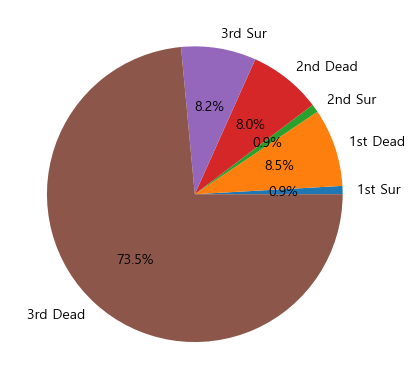

In [55]:
Ticket = ["1st Sur", "1st Dead", "2nd Sur", "2nd Dead", "3rd Sur", "3rd Dead"]
corre = [0,0,0,0,0,0]
for row in data:
    if row[2] == '1':
        if row[1] == '1':
            corre[0]+=1
        else:
            corre[1]+=1
    elif row[2] == '2':
        if row[1] == '1':
            corre[2]+=1
        else:
            corre[3]+=1
    else:
        if row[1] == '1':
            corre[4]+=1
        else:
            corre[5]+=1
print(corre)

plt.pie(corre, labels=Ticket, autopct="%.1f%%")
plt.show()